# Who Survived on the Titanic? (ML_Classification)

I will investigate what `factors` affect `survival` mostly with a dataset of different passengers' information in titanic shipwreck. In this project machine learning `classification` algorithms will be used to predict which passengers survived the sinking of the Titanic based on features with a real dataset.

To get a better understanding of the dataset some necessary modules will be imported below.

In [2]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load the Data

Now, we need to upload the downloaded datasets into this program, so that our code can read the datasets and perform the necessary actions using it. I will be using Python's powerful `Pandas` library to store `train.csv` and `test.csv` datasets in a `DataFrame`s.

In [3]:
# loading train data to DataFrame
train_df = pd.read_csv('train.csv')

In [4]:
# loading test data to DataFrame
test_df = pd.read_csv('test.csv')

Our datasets are now stored in the variables named `train_df` and `test_df` above. To get a brief idea about how the data is loaded, `.head()` command will be used to get a glimpse of the datasets in the form of a table.

In [5]:
# inspecting first five rows of train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# inspecting first five rows of test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis (EDA)

We can quickly check for data types and to make sure we do not have any missing values  which can prevent the model from running correctly by using `.info()`. As we have seen below, there are some `missing` or `NaN` values in the datasets. Some features will be removed from the datasets after checking `duplicated` and `unknown` or `NaN` values in the datasets. To do this we can use the `.duplicated().sum()` and `isna().any()` attributes to find those values on variables. The output will return to `True` if any `NaN` values will be found in the dataset, otherwise `False`. Then, let's investigate some statistical measures in a given datasets. 

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# checking duplicated values for train data
train_df.duplicated(subset = train_df.columns).sum()

0

In [14]:
# checking duplicated values for test data
test_df.duplicated(subset = test_df.columns).sum()

0

In [15]:
# checking missing values for train data
train_df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [16]:
# checking missing values for test data
test_df.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

<b> After seeing `NaN` values on `Age` variable in `training` and `test` datasets, `.replace()` method will be used to replace those values with the `mean` of the passengers' `Ages`. 

In [17]:
# finding mean of ages for training data
tr_ages_mean = train_df.Age.mean()

In [18]:
# replacing NaN values for training data
train_df.Age.replace(np.nan, tr_ages_mean, inplace = True)

In [19]:
# checking NaN values after replacing
train_df.Age.isna().sum()

0

In [20]:
# finding mean of ages for test data 
te_ages_mean = test_df.Age.mean()

In [21]:
test_df.Age.replace(np.nan, te_ages_mean, inplace = True)

In [22]:
# checking NaN values after replacing
test_df.Age.isna().sum()

0

<b> After seeing `NaN` values on `Embarked` variable in `training data`, `Pandas` helpful `value_counts()` will be used to check the most frequent values on Embarked variable. We can see that 'S' embarkation was described as a higher value in a variable. Then, the `.fillna()` method will be used to replace those `NaN` values with the `most frequent value`.

In [23]:
# checking embarkments in traning data
emb_counts = train_df['Embarked'].value_counts()

In [24]:
emb_counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
# creating most frequent value
most_frequent_val = emb_counts.index[0]

In [26]:
# replacing NaN values for training data
train_df['Embarked'] = train_df['Embarked'].fillna(most_frequent_val)

In [27]:
# checking NaN values after replacing
train_df.Embarked.isna().sum()

0

<b> Then `NaN` values in `Fare` variable of `test data` will be replaced by mean of the `Fares` in a test data.

In [28]:
# finding mean of fares for test data
te_fare_mean = test_df.Fare.mean()

In [29]:
# replacing NaN values for test data
test_df.Fare.replace(np.nan, te_fare_mean, inplace = True)

In [30]:
test_df.Fare.isna().sum()

0

# Feature Engineering

`Feature` `Engineering` refers to the process by which we choose the important `features` (or columns) to look at, and make the appropriate transformations to prepare our data for our model. After checking the `Sex` variable in `train.csv` and `test.csv` datasets I am going to use `label` `encoder` class to convert `features` into a numeric form as `0` for `female` and `1` for `male` by using `scikit-learn` library. The same process will be used again for the `Embarked` variable as `0` for `C`, to `1` for `Q` and to `2` for `S` embarkments for both datasets.

We might try:
- `Label Encoding of Datasets`
- `Removing Unnecessary Columns`
- `Data Visualization`
- `Select and Split the Data`
- `Normalizing or Standardizing the Data`

<b> Label Encoding of Datasets:

In [31]:
# creating encoder object
encoder = LabelEncoder()

In [32]:
# encoding variable for training data
train_df['Sex'] = encoder.fit_transform(train_df['Sex'])

In [33]:
# encoding variable for training data
train_df['Embarked'] = encoder.fit_transform(train_df['Embarked'])

In [34]:
# encoding variable for test data
test_df['Sex'] = encoder.fit_transform(test_df['Sex'])

In [35]:
# encoding variable for test data
test_df['Embarked'] = encoder.fit_transform(test_df['Embarked'])

<b> Removing Unnecessary Columns:

In [36]:
# creating indexes for test data before removing
pred_indexes = np.array(test_df['PassengerId'])

In [40]:
tr_fts_to_remove = train_df[['PassengerId','Name', 'Ticket', 'Cabin']]

In [41]:
# removing features for training data
train_df.drop(tr_fts_to_remove, axis = 1, inplace = True)

In [42]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [43]:
te_fts_to_remove = test_df[['PassengerId','Name', 'Ticket', 'Cabin']]

In [44]:
# removing features for test data
test_df.drop(te_fts_to_remove, axis = 1, inplace = True)

In [45]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


Let's check both datasets for `Nan` values lastly

In [46]:
print("Training data NaN values: \n",train_df.isna().sum())

Training data NaN values: 
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [47]:
print('Test data NaN values: \n', test_df.isna().sum())

Test data NaN values: 
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


<b>Data Visualization:

<b>Similar to linear regression, some classification models assume no `multicollinearity` in the data, meaning that two highly correlated `predictors` should not be included in the model. We can check this `assumption` by looking at a `correlation heatmap`. Pandas helpful `.corr()` method allows us to see the correlation coefficients for each pair of different features of the `train` and `test` datasets. There is no set value for what counts as `highly correlated`, however a general rule is a correlation of `0.7 (or -0.7)`. There are no pairs of features with a correlation of `0.7` or `higher`, so we do not need to consider leaving any features out of our model based on multicollinearity.

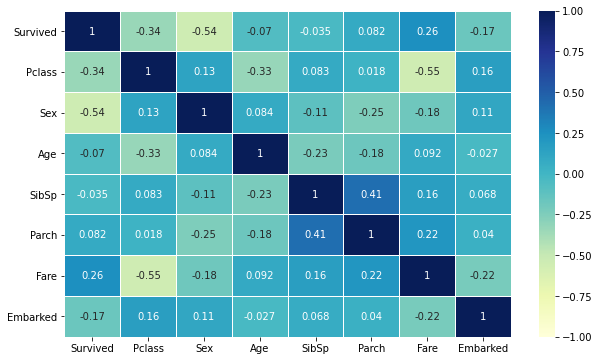

In [48]:
# correlation heatmap for train data
plt.figure(figsize = (10, 6))

sns.heatmap(train_df.corr(), 
            vmin = -1, center = 0, vmax = 1,
            annot = True, cmap = 'YlGnBu', linewidth = .5)

plt.show()

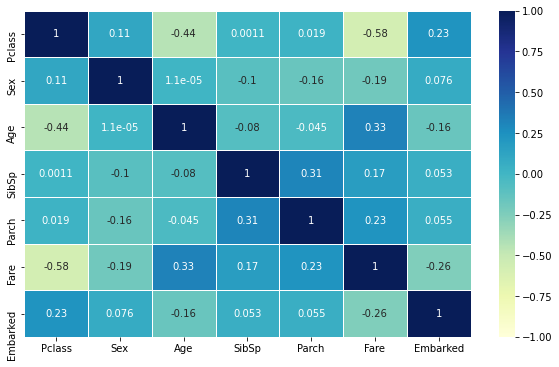

In [49]:
# correlation heat map for test data
plt.figure(figsize = (10, 6))

sns.heatmap(test_df.corr(), 
            vmin = -1, center = 0, vmax = 1,
            annot = True, cmap = 'YlGnBu', linewidth = .5)

plt.show()

<b> Boxplots for Train Data:

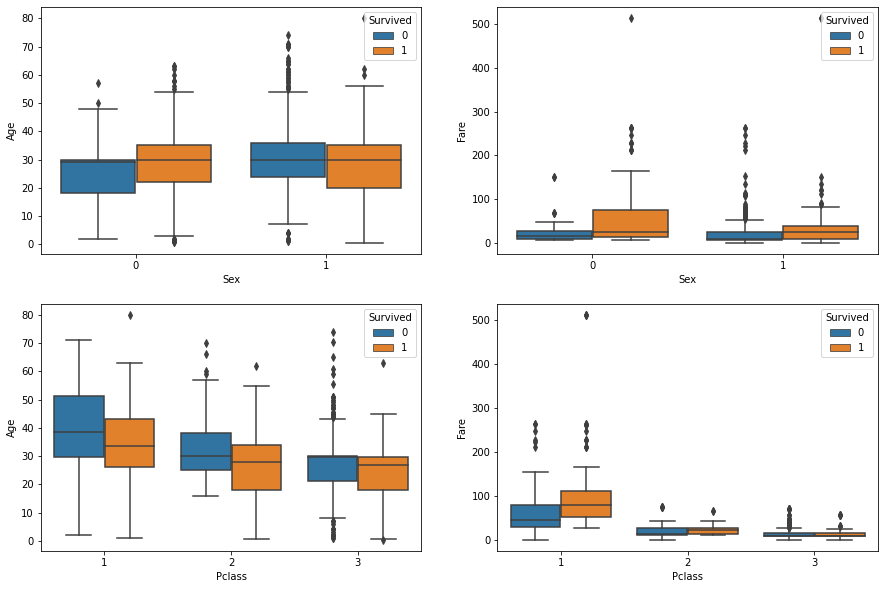

In [50]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))

sns.boxplot(x = 'Sex', y = 'Age', hue = 'Survived', data = train_df, ax = ax[0][0])
sns.boxplot(x = 'Sex', y = 'Fare', hue = 'Survived', data = train_df, ax = ax[0][1])
sns.boxplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train_df, ax = ax[1][0])
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train_df, ax = ax[1][1])

plt.show()

<b> Countplots for Train Data:

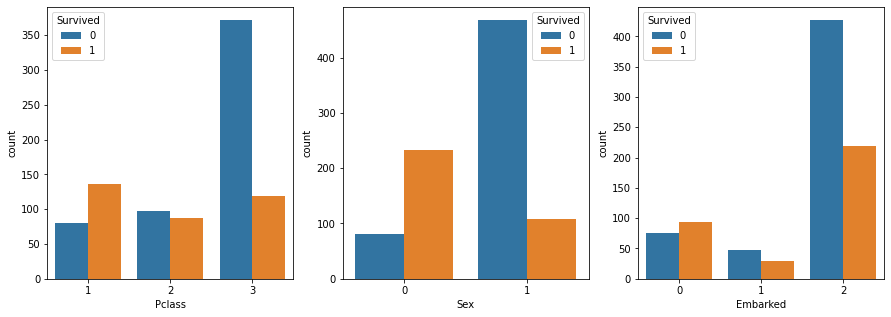

In [51]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df, ax = ax[0])
sns.countplot(x = 'Sex', hue = 'Survived', data = train_df, ax = ax[1])
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_df, ax = ax[2])

plt.show()

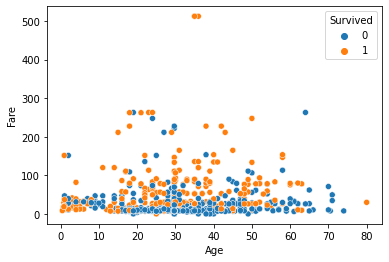

In [52]:
sns.scatterplot(x = 'Age', y = 'Fare', hue = 'Survived', data = train_df)

plt.show()

<b> Select and Split the Data:

Now that we have cleaned our data, let’s select the `variables` we want to build our `model` on. I am going to select the `Survived` variable as the `labels` of the `training` `data` before creating the model. Then, the rest of the variables of the `training` `data` will be selected to use as `features` on model below.

In [53]:
features = train_df.iloc[:, 1:8]
labels = train_df.loc[:, 'Survived']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .2, random_state = 1)

<b> Normalizing or Standardizing the Data:

After checking some visualizations above, we can see that we have some outliers in our dataset. Scikit-learn‘s `LogisticRegression` implementation uses `Regularization`. Many machine learning algorithms attempt to find trends in the data by comparing features of data points, however, there can be an issue when the features are on drastically different scales. The `goal` of `standardizing`  is to handle `outliers` and produce normalized data for every datapoint, so each feature is equally important. To normalize the data a `sklearn.preprocessing` package will be used to normalize values by using `.fit_transform()` and `.transform()`.

Lastly, data points of the `test` `data` will be `normalized` for future `prediction` by using a `selected` `model`.

In [55]:
scaler = StandardScaler()

In [56]:
# normalizing data points of training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# normalizing data points of test data
test_df = scaler.fit_transform(test_df)

# Choosing a Model, Tuning and Evaluating

<b> Logistic Regression:

After normalizing the dataset we will create a `LogisticRegression` model using the `sklearn`'s `.fit()` command on the training data. Fitting the model will perform `gradient` `descent` to find `coefficients` of the `features` that `minimize` the `log-loss` for the training data.

Training on the training set will be processed, then we will use the `.score()` command on the training and test sets. Scoring the model on the `training set` will run the data through the model and make final `classification`s on `survival` for each passenger in the `training set`. The returned `score` is the `percentage` of correct `classifications`, or the `accuracy`.

Similarly, scoring the model on the `testing set` will run the data through the model and make final `classification`s on `survival` for each passenger in the `test set`.

Finally, `coefficients` will be printed out by using `.coef_` function to see the `features` impact on each variable.

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
print('Logistic Regression training set acc: ',round(model.score(X_train, y_train)*100, 3), '\n')  
print('Logistic Regression test set acc: ',round(model.score(X_test, y_test)*100, 3))

Logistic Regression training set acc:  79.635 

Logistic Regression test set acc:  79.888


In [60]:
print('Features coefficients: ', '\n', model.coef_)

Features coefficients:  
 [[-0.99332224 -1.29491216 -0.53124361 -0.34972992  0.01290545  0.01050577
  -0.17086706]]


<b>After checking the different features and determining the model accuracy using `LogisticRegression` in the dataset above, it can be better to compare our model with other `classification` `algorithms` to see if we have any higher `accuracies` than the previous one.

It will be checked below techniques; 
- `K-Nearest Neighbors (KNN) Classifier`
- `Support Vector Machine (SVM) Classifier`
- `Decision Tree Classifier`
- `Random Forest Classifier`

<b> K-Nearest Neighbors (KNN) Classifier:

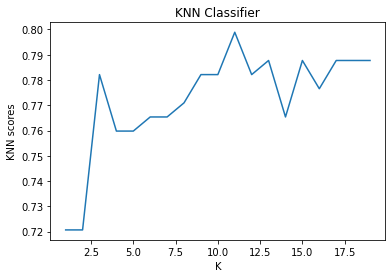

In [61]:
# finding the best optimized value
knn_scores = []
for i in range(1, 20):
    knn_clf = KNeighborsClassifier(n_neighbors = i)
    knn_clf.fit(X_train, y_train)
    knn_scores.append(knn_clf.score(X_test, y_test))
    
# plotting to check best vvalue
plt.plot(range(1, 20), knn_scores)

plt.title('KNN Classifier')
plt.xlabel('K')
plt.ylabel('KNN scores')

plt.show()

In [62]:
# create and train model
knn_clf = KNeighborsClassifier(n_neighbors = 11)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [63]:
# predicted classifications from the test data
knn_y_pred = knn_clf.predict(X_test)

In [64]:
# defining model accuracy 
print('KNN accuracy: ' + str(round(accuracy_score(knn_y_pred, y_test)*100, 3)))

KNN accuracy: 79.888


<b> Support Vector Machine (SVM) Classifier:

In [65]:
#finding the best optimized values
largest = {'accuracy': 0, 'gamma': 1, 'C': 1}

for gamma in range(1, 10):
    for C in range(1, 10):
        svm_clf = SVC(kernel = 'rbf', gamma = gamma, C = C)
        svm_clf.fit(X_train, y_train)
        score = svm_clf.score(X_test, y_test)
                    
        if(score > largest['accuracy']):
            largest['accuracy'] = round(score, 3)
            largest['gamma'] = gamma
            largest['C'] = C
            
print('SVM acc before best values: ', svm_clf.score(X_test, y_test), '\n')
print('Best values for SVM: ', largest)

SVM acc before best values:  0.7262569832402235 

Best values for SVM:  {'accuracy': 0.788, 'gamma': 1, 'C': 8}


In [66]:
# create and train model
svm_clf = SVC(kernel = 'rbf', gamma = 1, C = 8)
svm_clf.fit(X_train, y_train)

SVC(C=8, gamma=1)

In [67]:
# predicted classifications from the test data
svm_y_pred = svm_clf.predict(X_test)

In [68]:
# defining model accuracy 
print('SVM accuracy: ' + str(round(accuracy_score(svm_y_pred, y_test)*100, 3)))

SVM accuracy: 78.771


<b> Decision Tree Classifier:

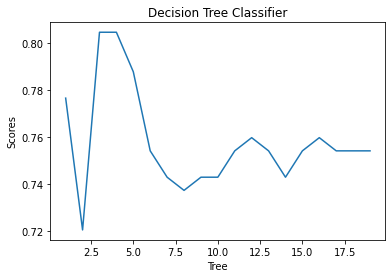

In [69]:
#checking the best optimised tree
scores = []
for i in range(1, 20):
    classifier = DecisionTreeClassifier(max_depth = i)
    classifier.fit(X_train, y_train)
    scores.append(classifier.score(X_test, y_test))

    
# plotting to check best value
plt.plot(range(1, 20), scores)

plt.title('Decision Tree Classifier')
plt.xlabel('Tree')
plt.ylabel('Scores')

plt.show()

In [70]:
# create and train model
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [71]:
# predicted classifications from the test data
dtr_y_pred = classifier.predict(X_test)

In [72]:
# defining model accuracy 
print('Decision Tree acc: ' + str(round(accuracy_score(dtr_y_pred, y_test)*100, 3)))

Decision Tree acc: 80.447


<b> Random Forest Classifier:

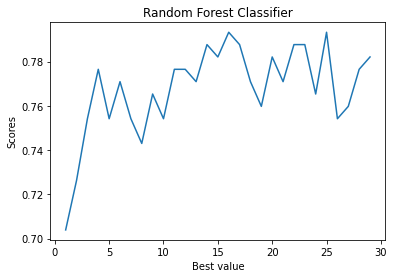

In [73]:
#checking the best optimised value
rfr_scores = []
for i in range(1, 30):
    rfr = RandomForestClassifier(n_estimators = i)
    rfr.fit(X_train, y_train)
    rfr_scores.append(rfr.score(X_test, y_test))


# plotting to check best value
plt.plot(range(1, 30), rfr_scores)

plt.title('Random Forest Classifier')
plt.xlabel('Best value')
plt.ylabel('Scores')

plt.show()

In [77]:
# create and train model
rfr = RandomForestClassifier(n_estimators = 18)
rfr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=18)

In [78]:
# predicted classifications from the test data
rfr_y_pred = rfr.predict(X_test)

In [79]:
print('Random Forest acc: ' + str(round(accuracy_score(rfr_y_pred, y_test)*100, 3)))

Random Forest acc: 78.212


# Using the Model and Predicting Results

After checking all coefficients of features and seeing the accuracy of the model using `.predict()` and `.score()`methods, we see that all accuracies are higher than `75` percentage. Despite multiple classification algorithms above, `DecisionTreeClassifier` can consider proper result.

In summary, we can classify new data samples belonging to positive or negative classes with their labels. The variables in `test` data store `7` features in the following order:

- `PClass`, with a `1` indicating the passenger is in `first class`, `2` indicating the passenger is in `second class` and `3` indicating the passenger is in `third class`
- `Sex`, represented by a `0` for `female` and `1` for `male`
- `Age`, represented as a float in years
- `SibSp`, represented number of siblings as an integer 
- `Parch`, represented number of parents as an integer
- `Fare`, represented passenger trip fares as a float
- `Embarked`, represented Port of Embarkation as an integer

In [81]:
# create and train model
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [82]:
# using model to predict test data
predictions = classifier.predict(test_df).reshape(len(test_df))

In [83]:
predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
# defining DataFrame and name the columns
df = pd.DataFrame(
    {
    'PassengerId': pred_indexes,
    'Survived': predictions.astype('int')
    })

In [93]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<b> In conclusion, predicted results will be saved in a file named `submission.csv` with the `PassengerId` and `Survived` variables.

In [94]:
df.to_csv('submission.csv', index = False)